In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print (tf.__version__)

2.6.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
len(train_labels)

60000

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

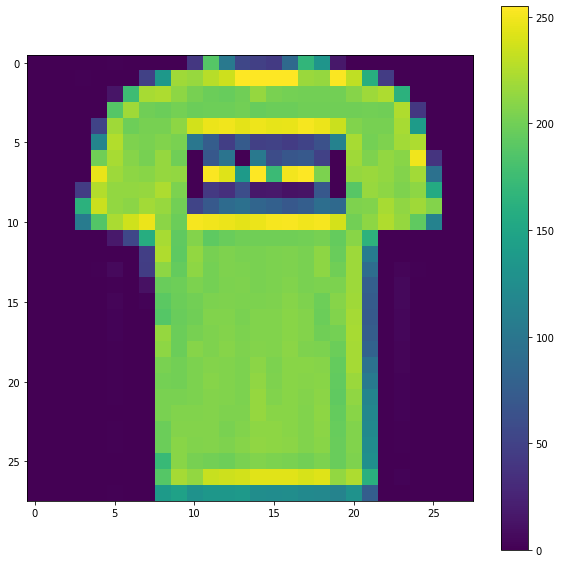

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

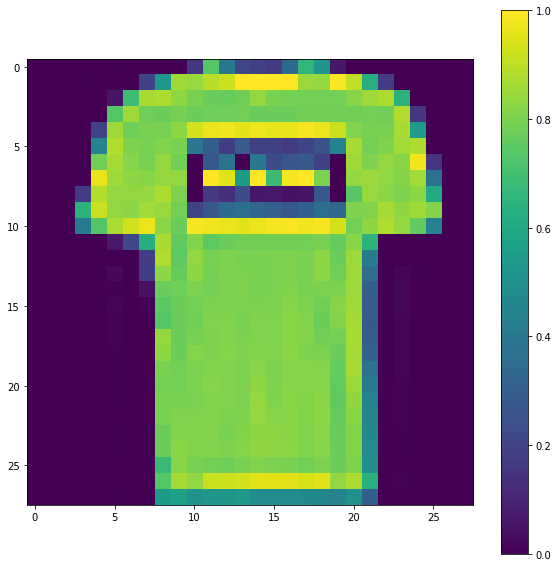

In [9]:
# 범위 조정 / 255.0

train_images = train_images/255.0
test_images = test_images/255.0

plt.figure(figsize=(10,10))
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

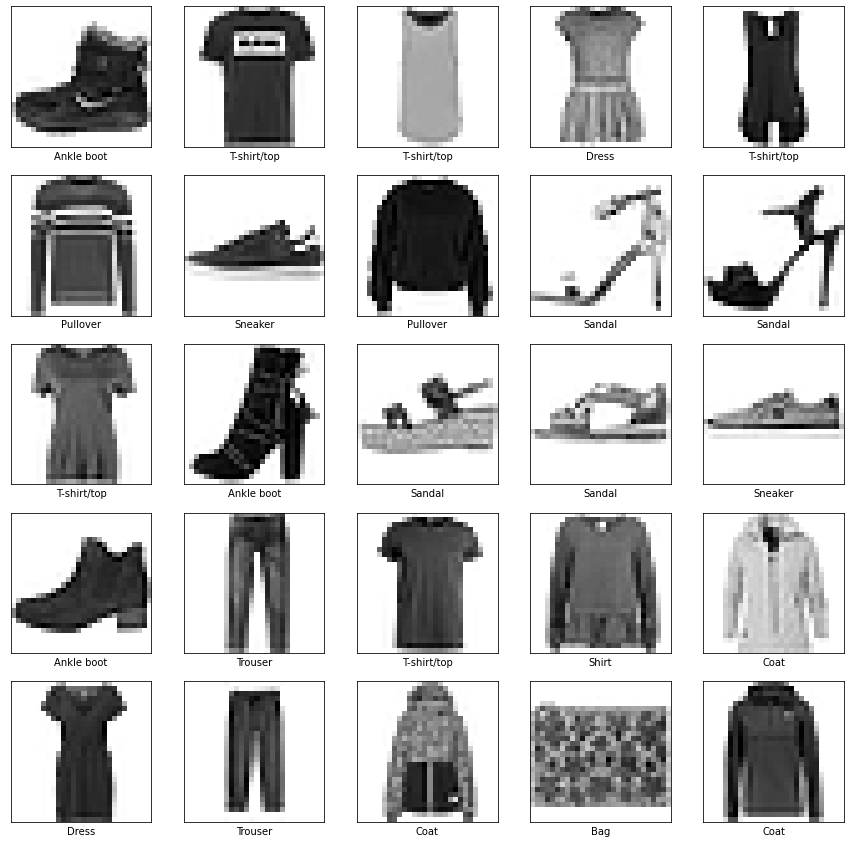

In [10]:
plt.figure(figsize=(15,15))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()


In [11]:
# 층을 구성한 다음에 컴파일

model = keras.Sequential([
    #2차원배열(28x28 픽셀)의 이미지 포맷을 28*28=784 픽셀의 1차원 배열로 변환
  keras.layers.Flatten(input_shape=(28,28)),
    #128개의 노드(뉴런)
  keras.layers.Dense(128, activation=tf.nn.relu),
    #10개의 노드의 소프트맥스층 (10개의 확률을 반환하고 반환된 값은 전체 합의 1이됨)
    #각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력
  keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [12]:
# 컴파일

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# 모델 훈련

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4952 - accuracy: 0.8253
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3749 - accuracy: 0.8663
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3388 - accuracy: 0.8773
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3146 - accuracy: 0.8855
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2946 - accuracy: 0.8903


In [14]:
# 성능 평가

test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3472 - accuracy: 0.8757


In [15]:
print(test_loss, test_acc)

0.3471614420413971 0.8756999969482422


In [16]:
# 예측

predictions = model.predict(test_images)
predictions[0]

array([3.4454695e-04, 3.5344053e-06, 1.3256498e-06, 1.7801925e-08,
       6.8893212e-05, 4.0329475e-02, 5.9162190e-05, 3.2731000e-01,
       3.2989934e-04, 6.3155317e-01], dtype=float32)

In [17]:
predictions[3]

array([4.2975404e-07, 9.9999380e-01, 4.0497365e-09, 5.7226052e-06,
       5.9776499e-09, 2.8942929e-13, 2.3388775e-09, 4.4652893e-18,
       3.8403009e-10, 1.8883710e-12], dtype=float32)

In [18]:
np.argmax(predictions[3])

1

In [19]:
test_labels[3]

1

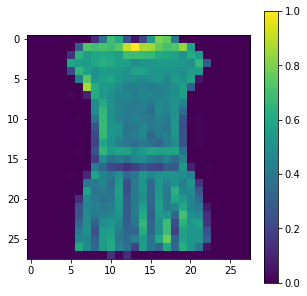

In [20]:
plt.figure(figsize=(5,5))
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

In [21]:
class_names[3]

'Dress'

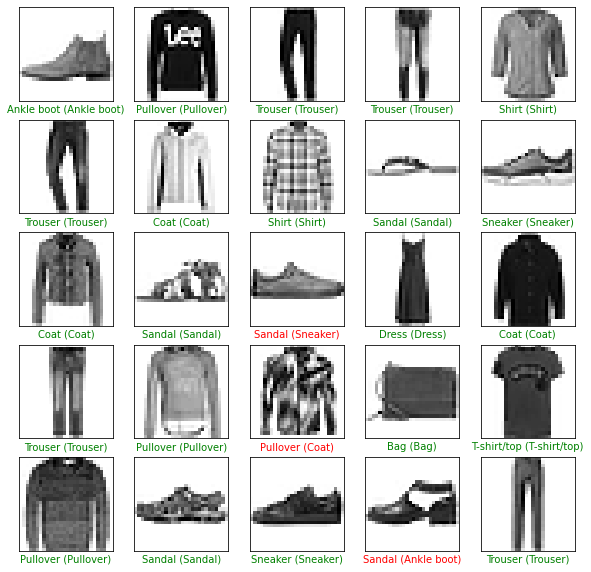

In [22]:
# 예측 만들기

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    # predictions에서 가장 큰 값을 predicted_label 로 가져온다.
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    # 이때 실제 test_label과 일치하면 초록색 글씨로,
    if predicted_label == true_label:
      color = 'green'
    # 일치하지 않으면 빨간색 글씨로 출력한다.
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label],class_names[true_label]),
                                  color=color)

In [28]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


In [29]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

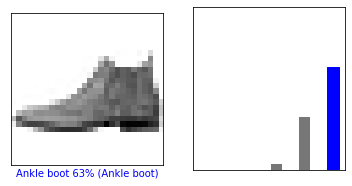

In [30]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

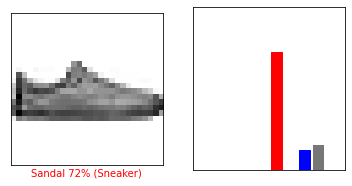

In [31]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

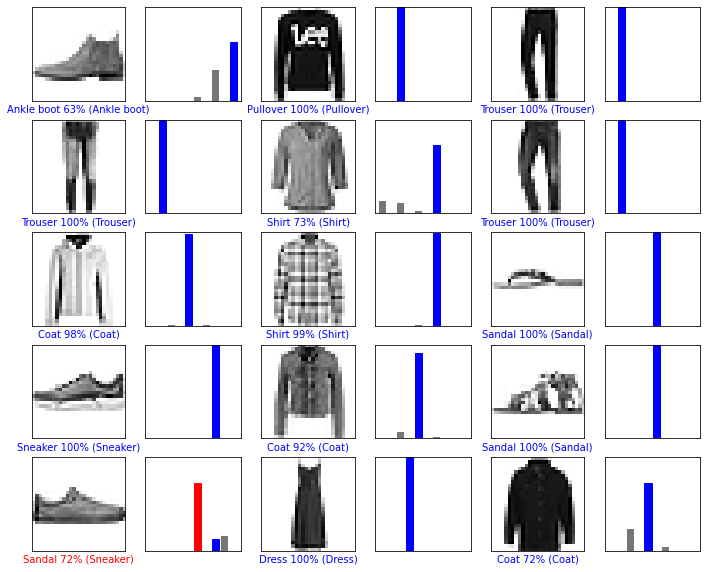

In [32]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냄
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [34]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[0]
print(img.shape)

(28, 28)


In [35]:
# 이미지 하나만 사용할 때도 배치에 추가
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [36]:
predictions_single = model.predict(img)

In [37]:
print(predictions_single)

[[3.4454724e-04 3.5344037e-06 1.3256491e-06 1.7801900e-08 6.8893380e-05
  4.0329464e-02 5.9162165e-05 3.2730973e-01 3.2989931e-04 6.3155347e-01]]


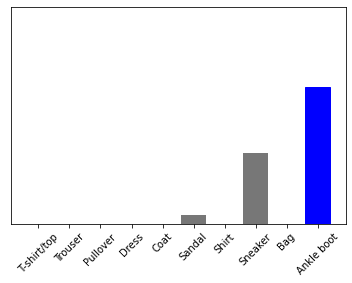

In [38]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [39]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

9
